In [1]:
from pycocotools.coco import COCO
import requests
import skimage.io as io
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [6]:
category = 'dog'

In [7]:
# instantiate COCO specifying the annotations json path
coco = COCO('annotations\instances_val2017.json')
# Specify a list of category names of interest
catIds = coco.getCatIds(catNms=[category])
# Get the corresponding image ids and images using loadImgs
imgIds = coco.getImgIds(catIds=catIds)
images = coco.loadImgs(imgIds)

loading annotations into memory...
Done (t=1.27s)
creating index...
index created!


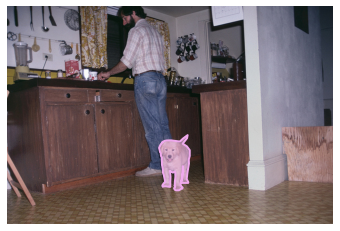

In [9]:
index = 0
image = images[index]
I = io.imread(image['coco_url'])

plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=image['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

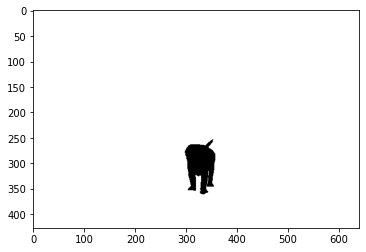

In [10]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
mask = 1-np.where(mask!=0, 1, 0)
plt.imshow(mask, cmap = 'gray')

# Save image and mask

In [6]:
plt.imsave(f'input/{category}.jpg', I)
np.save(f'input/{category}_gt.npy', mask)